In [1]:

import ia_misc as ia
import matplotlib.pyplot as plt
import numpy as np

array([ 0.45331786,  1.80527857,  0.6378837 ,  0.        ,  0.93522489,
        9.90776067, 10.94099694,  8.62063616,  9.54845545,  8.5       ,
        5.40776067,  6.44099694,  4.12063616,  5.04845545,  4.        ])

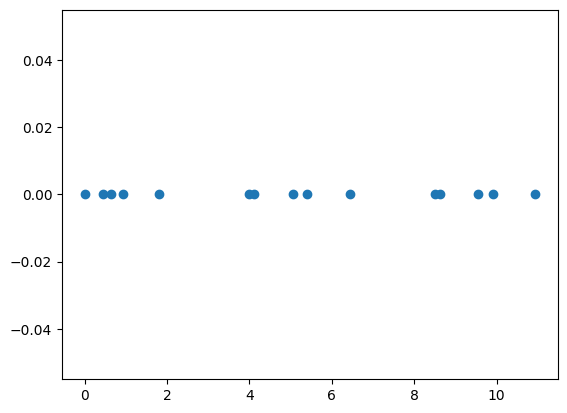

In [2]:
data = ia.getClusters(5, 8.5, 4)

x=data['x']
y=np.zeros(len(data['x']))
plt.scatter(x,y)
x

In [3]:
#Select k random centers
k=3
centros_indice = np.random.permutation(len(x))[:k]
print(centros_indice)


[ 4 11  2]


(-1.0, 15.0)

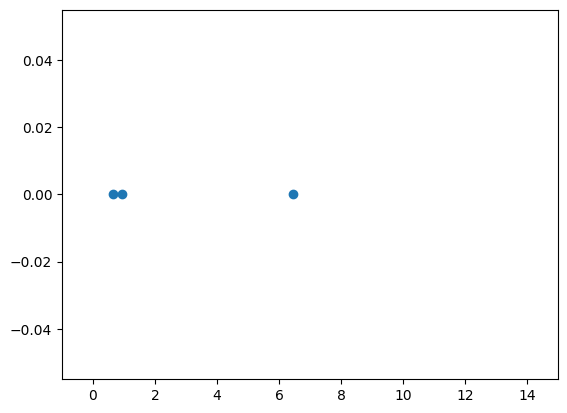

In [4]:
puntos_centro=x[centros_indice]
plt.scatter(puntos_centro, np.zeros(len(centros_indice)))
plt.xlim([-1, 15])

### 2. Asign Points to Closest Seed Point

In [5]:
### ESTE ES MI EJEMPLO ###

distancias = {}

for i in range(len(x)):
    distancias[i] = np.abs(x[i] - centros_indice)
    
print(distancias)
minor_distance = {}
for i in distancias:
    minor_distance[i]=distancias[i].argmin()
minor_distance_order = sorted(minor_distance.items(), key=lambda x: x[1])
minor_distance_order
    

{0: array([ 3.54668214, 10.54668214,  1.54668214]), 1: array([2.19472143, 9.19472143, 0.19472143]), 2: array([ 3.3621163, 10.3621163,  1.3621163]), 3: array([ 4., 11.,  2.]), 4: array([ 3.06477511, 10.06477511,  1.06477511]), 5: array([5.90776067, 1.09223933, 7.90776067]), 6: array([6.94099694, 0.05900306, 8.94099694]), 7: array([4.62063616, 2.37936384, 6.62063616]), 8: array([5.54845545, 1.45154455, 7.54845545]), 9: array([4.5, 2.5, 6.5]), 10: array([1.40776067, 5.59223933, 3.40776067]), 11: array([2.44099694, 4.55900306, 4.44099694]), 12: array([0.12063616, 6.87936384, 2.12063616]), 13: array([1.04845545, 5.95154455, 3.04845545]), 14: array([0., 7., 2.])}


[(10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2)]

In [ ]:
##EJEMPLO MIO##


In [6]:
#EJEMPLO DEL PROFE##

clusters = {}
sigma = 1

for centro in centros_indice:
    clusters[x[centro]] = []
    for punto in x:
        distancia = ia.euclidian_distance(x[centro], punto)
        
        if distancia <= sigma:
            clusters[x[centro]].append(punto)
            
clusters
            

{0.9352248926343036: [0.45331785669736124,
  1.8052785671937819,
  0.6378836971020883,
  0.0,
  0.9352248926343036],
 6.4409969434973355: [6.4409969434973355],
 0.6378836971020883: [0.45331785669736124,
  0.6378836971020883,
  0.0,
  0.9352248926343036]}

### 3. Identify New Center Points
El problema de los promedios. Hay que tener cuidado con el uso de promedios no pesados y pesados.

In [7]:
centros = []
for cluster in clusters:
    centros.append(np.mean(clusters[cluster])) 
centros

[0.7663410027255071, 6.4409969434973355, 0.5066066116084382]

(-1.0, 15.0)

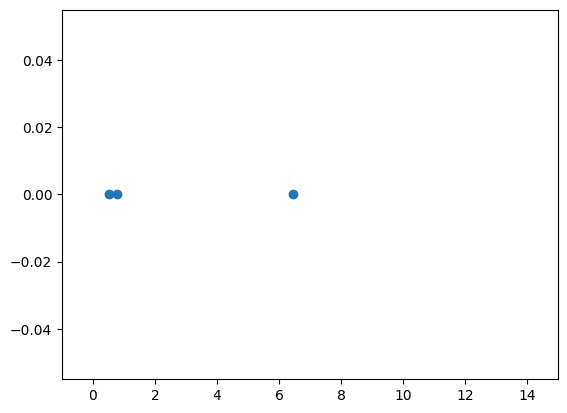

In [8]:
plt.scatter(centros, y=np.zeros(len(centros)))
plt.xlim([-1, 15])


### 4. Assign Point to Closest Centroid

In [9]:
#EJEMPLO DEL PROFE##

clusters = {}
sigma = 2

for centro in centros :
    clusters[centro]= []
    for punto in x:
        distancia = ia.euclidian_distance([centro], punto)
        
        if distancia <= sigma:
            clusters[centro].append(punto)
            
clusters
           

{0.7663410027255071: [0.45331785669736124,
  1.8052785671937819,
  0.6378836971020883,
  0.0,
  0.9352248926343036],
 6.4409969434973355: [5.407760666402094,
  6.4409969434973355,
  5.048455453793892],
 0.5066066116084382: [0.45331785669736124,
  1.8052785671937819,
  0.6378836971020883,
  0.0,
  0.9352248926343036]}

### 5 Identify new clusters

(-1.0, 15.0)

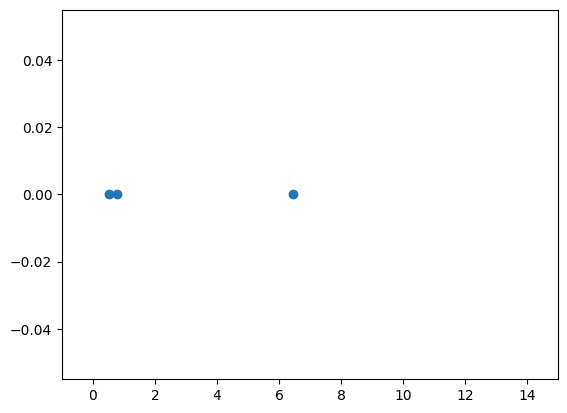

In [10]:
plt.scatter(centros, y=np.zeros(len(centros)))
plt.xlim([-1, 15])

In [11]:
centros_previo=[centros[0], centros[1], centros[2]]
sigma_conv=0.005

bandera_val=0
for indx, centro in enumerate(centros_indice):
    if np.abs(centros_previo[indx]-centro) <= sigma_conv:
        bandera_val+=1
bandera_val

0